In [3]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [4]:
#read_data
df=pd.read_csv('Sonar_data.csv')
df.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       208 non-null    float64
 1   2       208 non-null    float64
 2   3       208 non-null    float64
 3   4       208 non-null    float64
 4   5       208 non-null    float64
 5   6       208 non-null    float64
 6   7       208 non-null    float64
 7   8       208 non-null    float64
 8   9       208 non-null    float64
 9   10      208 non-null    float64
 10  11      208 non-null    float64
 11  12      208 non-null    float64
 12  13      208 non-null    float64
 13  14      208 non-null    float64
 14  15      208 non-null    float64
 15  16      208 non-null    float64
 16  17      208 non-null    float64
 17  18      208 non-null    float64
 18  19      208 non-null    float64
 19  20      208 non-null    float64
 20  21      208 non-null    float64
 21  22      208 non-null    float64
 22  23

In [6]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
#sns.pairplot(df)

In [8]:
df['61'].value_counts()

61
M    111
R     97
Name: count, dtype: int64

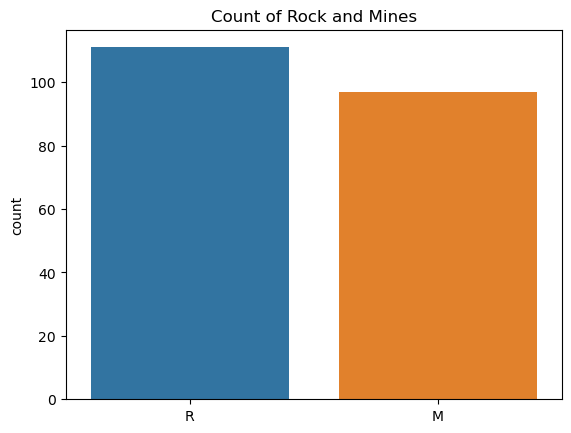

In [9]:
sns.barplot(x=df['61'].unique(),y=df['61'].value_counts())
plt.title("Count of Rock and Mines")
plt.show()

In [10]:
# M represents mine
# R represents Rock
df.groupby('61').mean()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
61,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [11]:
x=df.drop(columns='61',axis=1)
y=df['61']
print(x.shape,y.shape)

(208, 60) (208,)


In [12]:
print(x)
print(y)

          1       2       3       4       5       6       7       8       9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         10  ...      51      52      53      54   

In [13]:
#split the data into traning and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/2,stratify=y,random_state=1)

In [14]:
print(x.shape,x_train.shape,x_test.shape)

(208, 60) (104, 60) (104, 60)


In [15]:
print(y.shape,y_train.shape,y_test.shape)

(208,) (104,) (104,)


In [16]:
#model training
model=LogisticRegression()

In [17]:
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
#model evaluation
#accuracy on the training data
x_train_prediction=model.predict(x_train)
accuracy=accuracy_score(x_train_prediction,y_train)

In [19]:
print(f"Accuracy on training data: {accuracy:.3f}")

Accuracy on training data: 0.865


In [20]:
#accuracy on the test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [21]:
print(f"Accuracy on testing data:{test_data_accuracy}")

Accuracy on testing data:0.7788461538461539


In [26]:
input_data=(0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.066,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032)
input_data_as_numpy_array=np.asarray(input_data)
print(input_data_as_numpy_array.shape)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped.shape)

(60,)
(1, 60)


In [23]:
new_predictions=model.predict(input_data_reshaped)
print(new_predictions)
if new_predictions=='R':
    print("It is rock!")
else:
    print("It is a Mine!")

['R']
It is rock!


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
